# Quantum Fourier Transform

https://en.wikipedia.org/wiki/Quantum_Fourier_transform

## Imports

In [1]:
%matplotlib inline

In [2]:
from sympy import init_printing
init_printing(use_latex=True)

In [3]:
from IPython.display import display

In [4]:
from sympy import sqrt, symbols, Rational
from sympy import expand, Eq, Symbol, simplify, exp, sin
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import *
from sympy.physics.quantum.gate import *
from sympy.physics.quantum.qft import QFT, IQFT, Fourier
from sympy.physics.quantum.circuitplot import circuit_plot

In [31]:
g = H(0)

In [33]:
gmat = represent(g, nqubits=2, format='scipy.sparse')

In [ ]:
gmat.t

## QFT Gate and Circuit

In [51]:
nqubits = 13

In [52]:
def simulate(circuit, state, nqubits):
    gates = circuit.args
    vector = represent(state, nqubits=nqubits, format='numpy')
    for gate in reversed(gates):
        gate_matrix = represent(gate, nqubits=nqubits, format='scipy.sparse')
        gate_matrix = gate_matrix.tocsr()
        vector = gate_matrix.dot(vector)
    return vector

In [53]:
fourier = QFT(0,nqubits).decompose()
# fourier

In [54]:
state = Qubit(nqubits*'0')
state

In [55]:
%%timeit -n1 -r1
simulate(fourier, state, nqubits)

1min 18s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


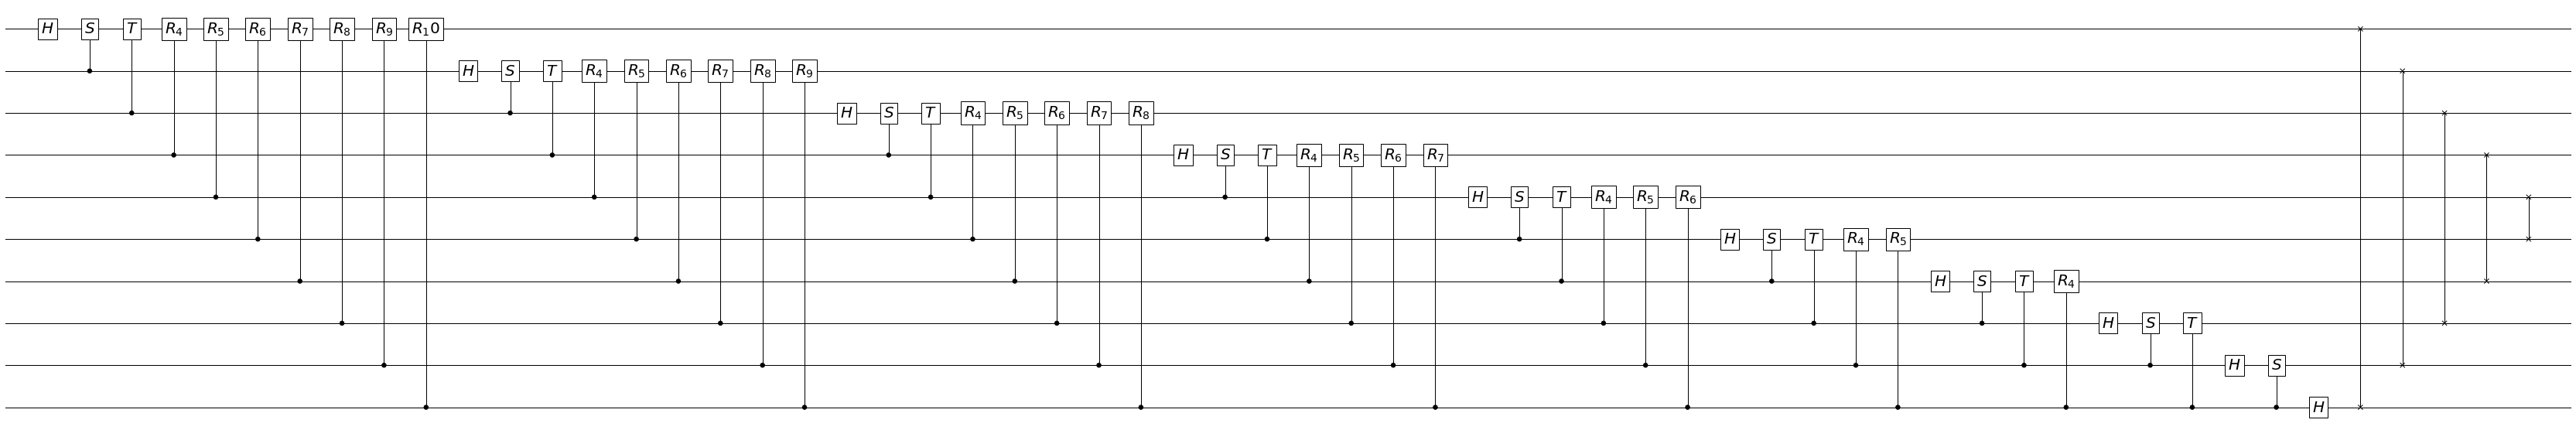

In [28]:
circuit_plot(fourier, nqubits=nqubits)